In [18]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set style and figures inline
sns.set()
%matplotlib inline

In [19]:
confirmed_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

death_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

recovery_cases_data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [20]:
# import data and check it out
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)

raw_data_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549


In [21]:
# Group by region
data_day = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
data_day.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,56595,56676,56717,56779,56873,56943,57019,57144,57160,57242
Albania,0,0,0,0,0,0,0,0,0,0,...,126183,126531,126795,126936,127192,127509,127795,128155,128393,128518
Algeria,0,0,0,0,0,0,0,0,0,0,...,117524,117622,117739,117879,118004,118116,118251,118378,118516,118645
Andorra,0,0,0,0,0,0,0,0,0,0,...,12174,12231,12286,12328,12363,12409,12456,12497,12545,12581
Angola,0,0,0,0,0,0,0,0,0,0,...,22579,22631,22717,22885,23010,23108,23242,23331,23457,23549


In [22]:
df = data_day.transpose()

In [23]:
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region',var_name='date')
data.head()

,Country/Region,date,value
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [24]:
data.loc[(data.value < 1),'value'] = None
data.head()

,Country/Region,date,value
0,Afghanistan,1/22/20,NaN
1,Albania,1/22/20,NaN
2,Algeria,1/22/20,NaN
3,Andorra,1/22/20,NaN
4,Angola,1/22/20,NaN


In [25]:
# pivot data to wide and index by date

df = data.pivot(index='date', columns='Country/Region', values='value')
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
9/5/20,38324.0,10102.0,46071.0,1215.0,2935.0,95.0,471806.0,44649.0,26278.0,29087.0,...,346513.0,1669.0,43293.0,NaN,52165.0,1049.0,25575.0,1983.0,12709.0,6837.0
9/6/20,38398.0,10255.0,46364.0,1215.0,2965.0,95.0,478792.0,44783.0,26321.0,29271.0,...,349500.0,1679.0,43587.0,NaN,53289.0,1049.0,26127.0,1987.0,12776.0,6837.0
9/7/20,38494.0,10406.0,46653.0,1261.0,2981.0,95.0,488007.0,44845.0,26373.0,29561.0,...,352453.0,1693.0,43893.0,NaN,54350.0,1049.0,26779.0,1989.0,12836.0,7298.0
9/8/20,38520.0,10553.0,46938.0,1261.0,3033.0,95.0,500034.0,44953.0,26465.0,30081.0,...,354934.0,1712.0,44281.0,NaN,55563.0,1054.0,27363.0,1994.0,12952.0,7388.0
9/9/20,38544.0,10704.0,47216.0,1301.0,3092.0,95.0,512293.0,45152.0,26524.0,30583.0,...,357615.0,1741.0,44930.0,NaN,56751.0,1059.0,27919.0,1999.0,13112.0,7429.0


In [26]:
# check out index
df.index

Index(['1/1/21', '1/10/21', '1/11/21', '1/12/21', '1/13/21', '1/14/21',
       '1/15/21', '1/16/21', '1/17/21', '1/18/21',
       ...
       '9/28/20', '9/29/20', '9/3/20', '9/30/20', '9/4/20', '9/5/20', '9/6/20',
       '9/7/20', '9/8/20', '9/9/20'],
      dtype='object', name='date', length=447)

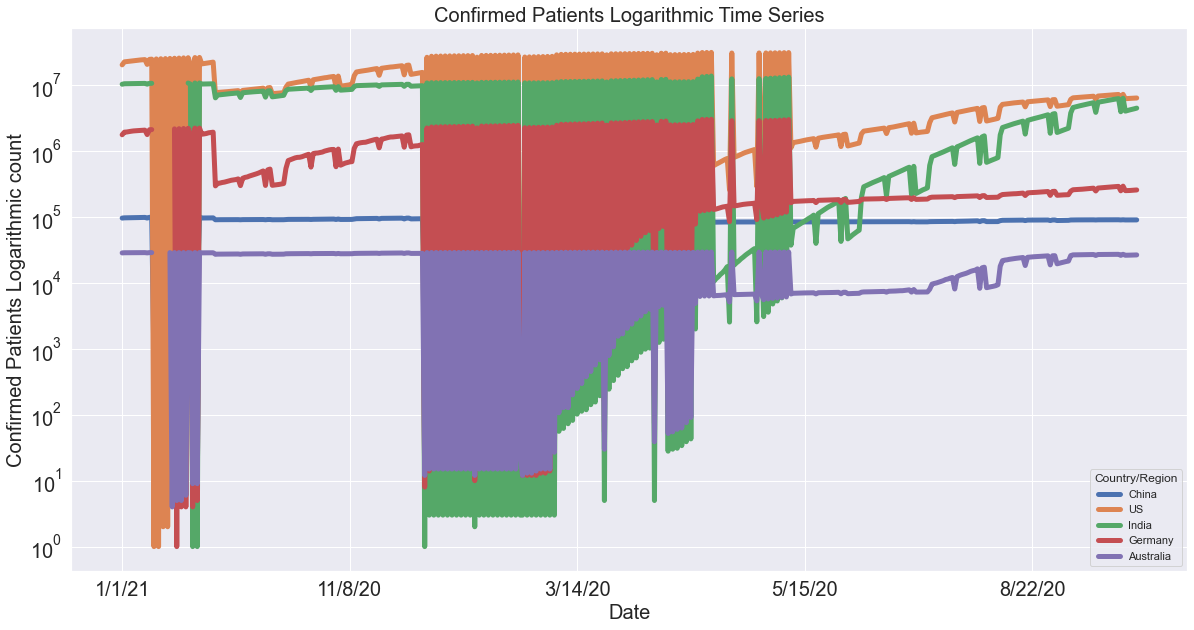

In [31]:
# plot time series of several countries of interest
poi = ['China', 'US', 'India', 'Germany', 'Australia']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Confirmed Patients Logarithmic count', fontsize=20);
plt.title('Confirmed Patients Logarithmic Time Series', fontsize=20);


In [32]:
# IMPORT data and check it out

raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2496,2497,2508,2512,2512,2516,2521,2521,2521,2529
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2256,2265,2274,2283,2291,2297,2304,2310,2317,2321
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3102,3105,3108,3112,3116,3119,3123,3126,3130,3134
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,117,117,117,117,119,120,120,120,120,121
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,540,542,543,547,547,549,549,550,553,554


In [33]:
# Group by region
data_day = raw_data_deaths.groupby(["Country/Region"]).sum().drop(['Lat','Long'], axis=1)
df = data_day.transpose()
# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')

data.loc[(data.value < 25),'value'] = None
# pivot data to wide & index by date
df = data.pivot(index='date', columns='Country/Region',values='value')

datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace=True)

In [34]:
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-09-05,1410.0,312.0,1549.0,53.0,117.0,NaN,9739.0,895.0,753.0,735.0,...,41638.0,45.0,343.0,NaN,420.0,35.0,177.0,572.0,292.0,206.0
2020-09-06,1413.0,316.0,1556.0,53.0,117.0,NaN,9859.0,897.0,762.0,736.0,...,41640.0,45.0,347.0,NaN,428.0,35.0,181.0,572.0,295.0,206.0
2020-09-07,1416.0,319.0,1562.0,53.0,120.0,NaN,10129.0,900.0,770.0,746.0,...,41643.0,45.0,352.0,NaN,436.0,35.0,184.0,573.0,295.0,210.0
2020-09-08,1419.0,321.0,1571.0,53.0,124.0,NaN,10405.0,903.0,781.0,747.0,...,41675.0,45.0,358.0,NaN,444.0,35.0,190.0,576.0,297.0,218.0
2020-09-09,1421.0,322.0,1581.0,53.0,126.0,NaN,10658.0,905.0,788.0,747.0,...,41683.0,45.0,366.0,NaN,452.0,35.0,192.0,576.0,300.0,222.0


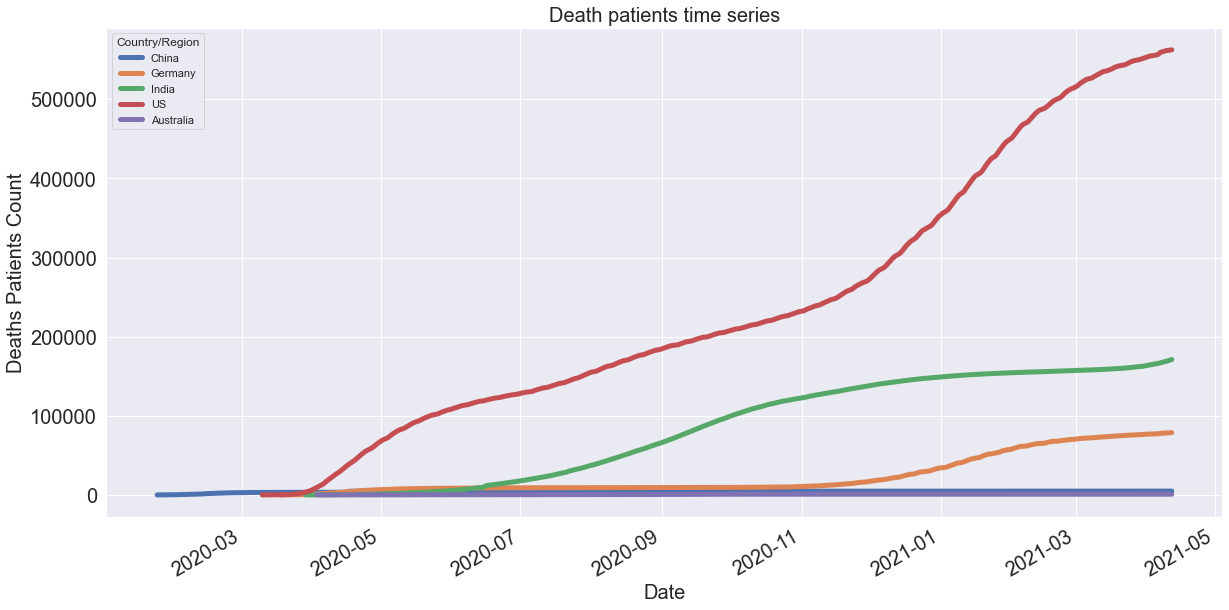

In [35]:
# plot time series of several countries of interest
poi = ['China','Germany','India','US','Australia','']
df[poi].plot(figsize=(20,10), linewidth=5,fontsize=20)
plt.xlabel('Date',fontsize=20);
plt.ylabel('Deaths Patients Count',fontsize=20);
plt.title('Death patients time series', fontsize=20);


In [36]:
df.dropna(axis=1, how='all', inplace=True)
df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,2191.0,1181.0,2762.0,84.0,405.0,NaN,43319.0,2828.0,909.0,6261.0,...,671.0,74237.0,193.0,614.0,1030.0,35.0,1418.0,610.0,390.0,369.0
2021-01-10,2277.0,1241.0,2807.0,85.0,416.0,NaN,44495.0,2929.0,909.0,6723.0,...,708.0,81567.0,256.0,617.0,1061.0,35.0,1604.0,611.0,469.0,507.0
2021-01-11,2288.0,1247.0,2812.0,85.0,420.0,NaN,44654.0,2931.0,909.0,6747.0,...,711.0,82096.0,262.0,617.0,1073.0,35.0,1614.0,612.0,471.0,528.0
2021-01-12,2301.0,1252.0,2816.0,86.0,422.0,NaN,44848.0,2941.0,909.0,6819.0,...,717.0,83342.0,269.0,617.0,1078.0,35.0,1630.0,612.0,495.0,551.0
2021-01-13,2301.0,1256.0,2819.0,87.0,424.0,NaN,44983.0,2951.0,909.0,6868.0,...,723.0,84910.0,275.0,618.0,1084.0,35.0,1658.0,612.0,509.0,589.0


In [37]:
df = df.sort_index()
df1 = df.reset_index().drop(['date'],axis=1)
df1.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
for col in df1.columns:
    print(col, df1[col].first_valid_index())
    df1[col] = df1[col].shift(-df1[col].first_valid_index())

Afghanistan 84
Albania 84
Algeria 64
Andorra 78
Angola 172
Antigua and Barbuda 415
Argentina 69
Armenia 93
Australia 72
Austria 62
Azerbaijan 100
Bahamas 212
Bahrain 137
Bangladesh 79
Barbados 391
Belarus 81
Belgium 58
Belize 252
Benin 171
Bolivia 82
Bosnia and Herzegovina 75
Botswana 288
Brazil 60
Bulgaria 79
Burkina Faso 80
Burma 236
Cabo Verde 194
Cambodia 444
Cameroon 88
Canada 61
Central African Republic 152
Chad 106
Chile 73
China 2
Colombia 72
Comoros 356
Congo (Brazzaville) 145
Congo (Kinshasa) 87
Costa Rica 168
Cote d'Ivoire 115
Croatia 82
Cuba 85
Cyprus 261
Czechia 69
Denmark 62
Djibouti 132
Dominican Republic 66
Ecuador 62
Egypt 65
El Salvador 114
Equatorial Guinea 146
Estonia 81
Eswatini 182
Ethiopia 137
Finland 73
France 47
Gabon 145
Gambia 202
Georgia 245
Germany 56
Ghana 114
Greece 64
Guatemala 109
Guinea 143
Guinea-Bissau 163
Guyana 209
Haiti 122
Honduras 81
Hungary 72
Iceland 295
India 67
Indonesia 57
Iran 36
Iraq 62
Ireland 66
Israel 70
Italy 38
Jamaica 225
Japan 54
J

In [39]:
df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))

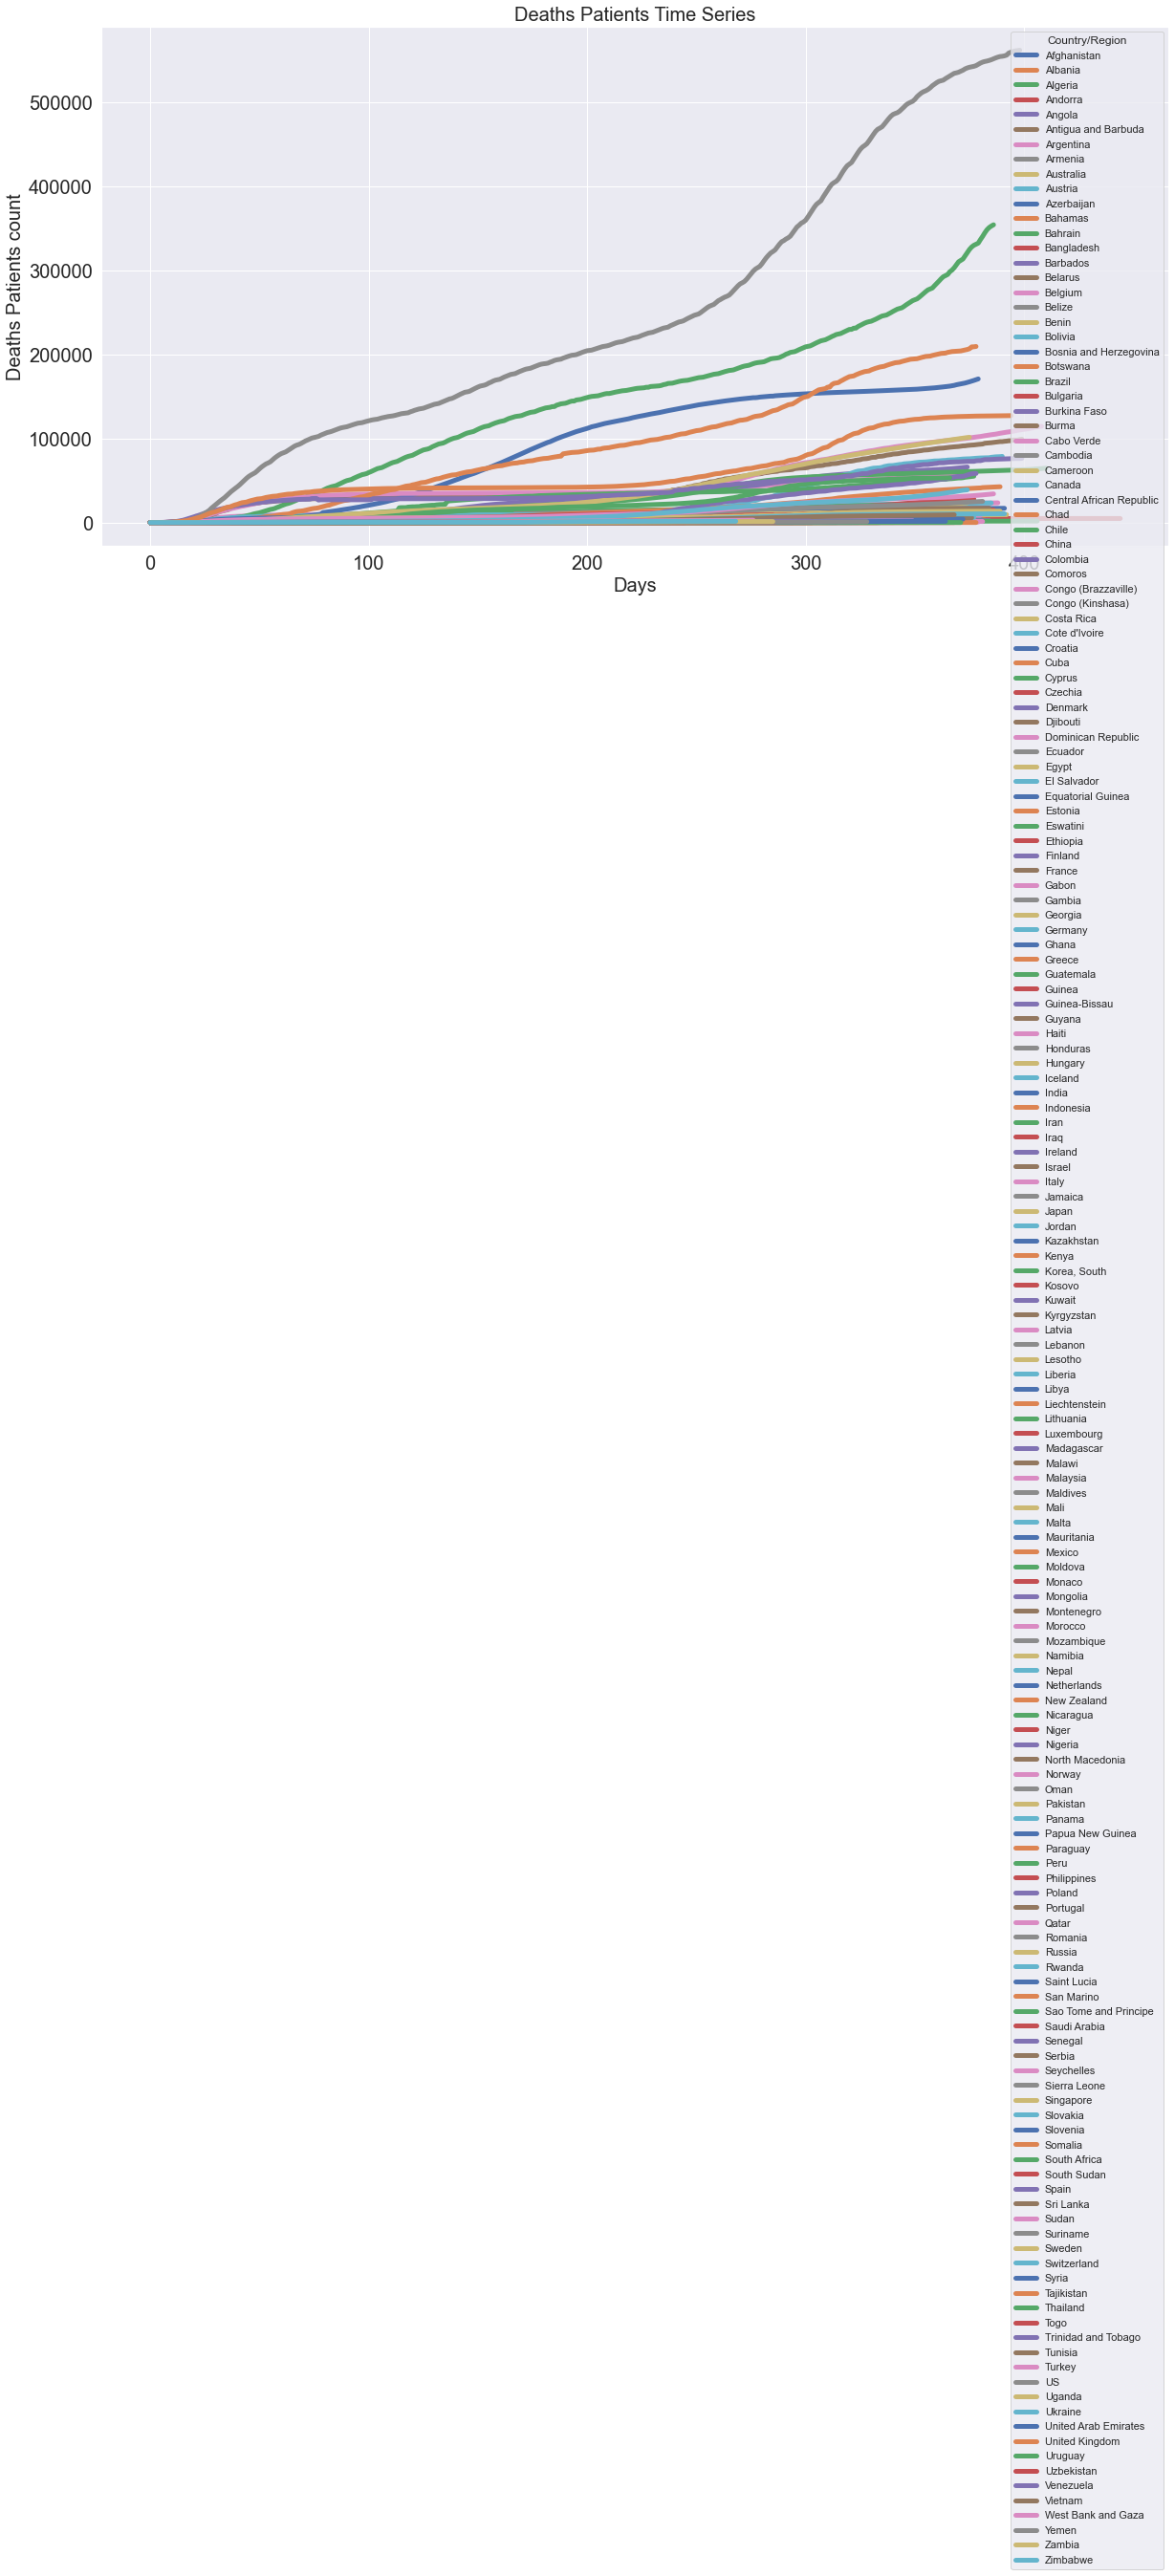

In [42]:
# plot time series of several countries of interest
df2.plot(figsize=(20,10),linewidth=5, fontsize=20)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients count', fontsize=20)
plt.title('Deaths Patients Time Series', fontsize=20);


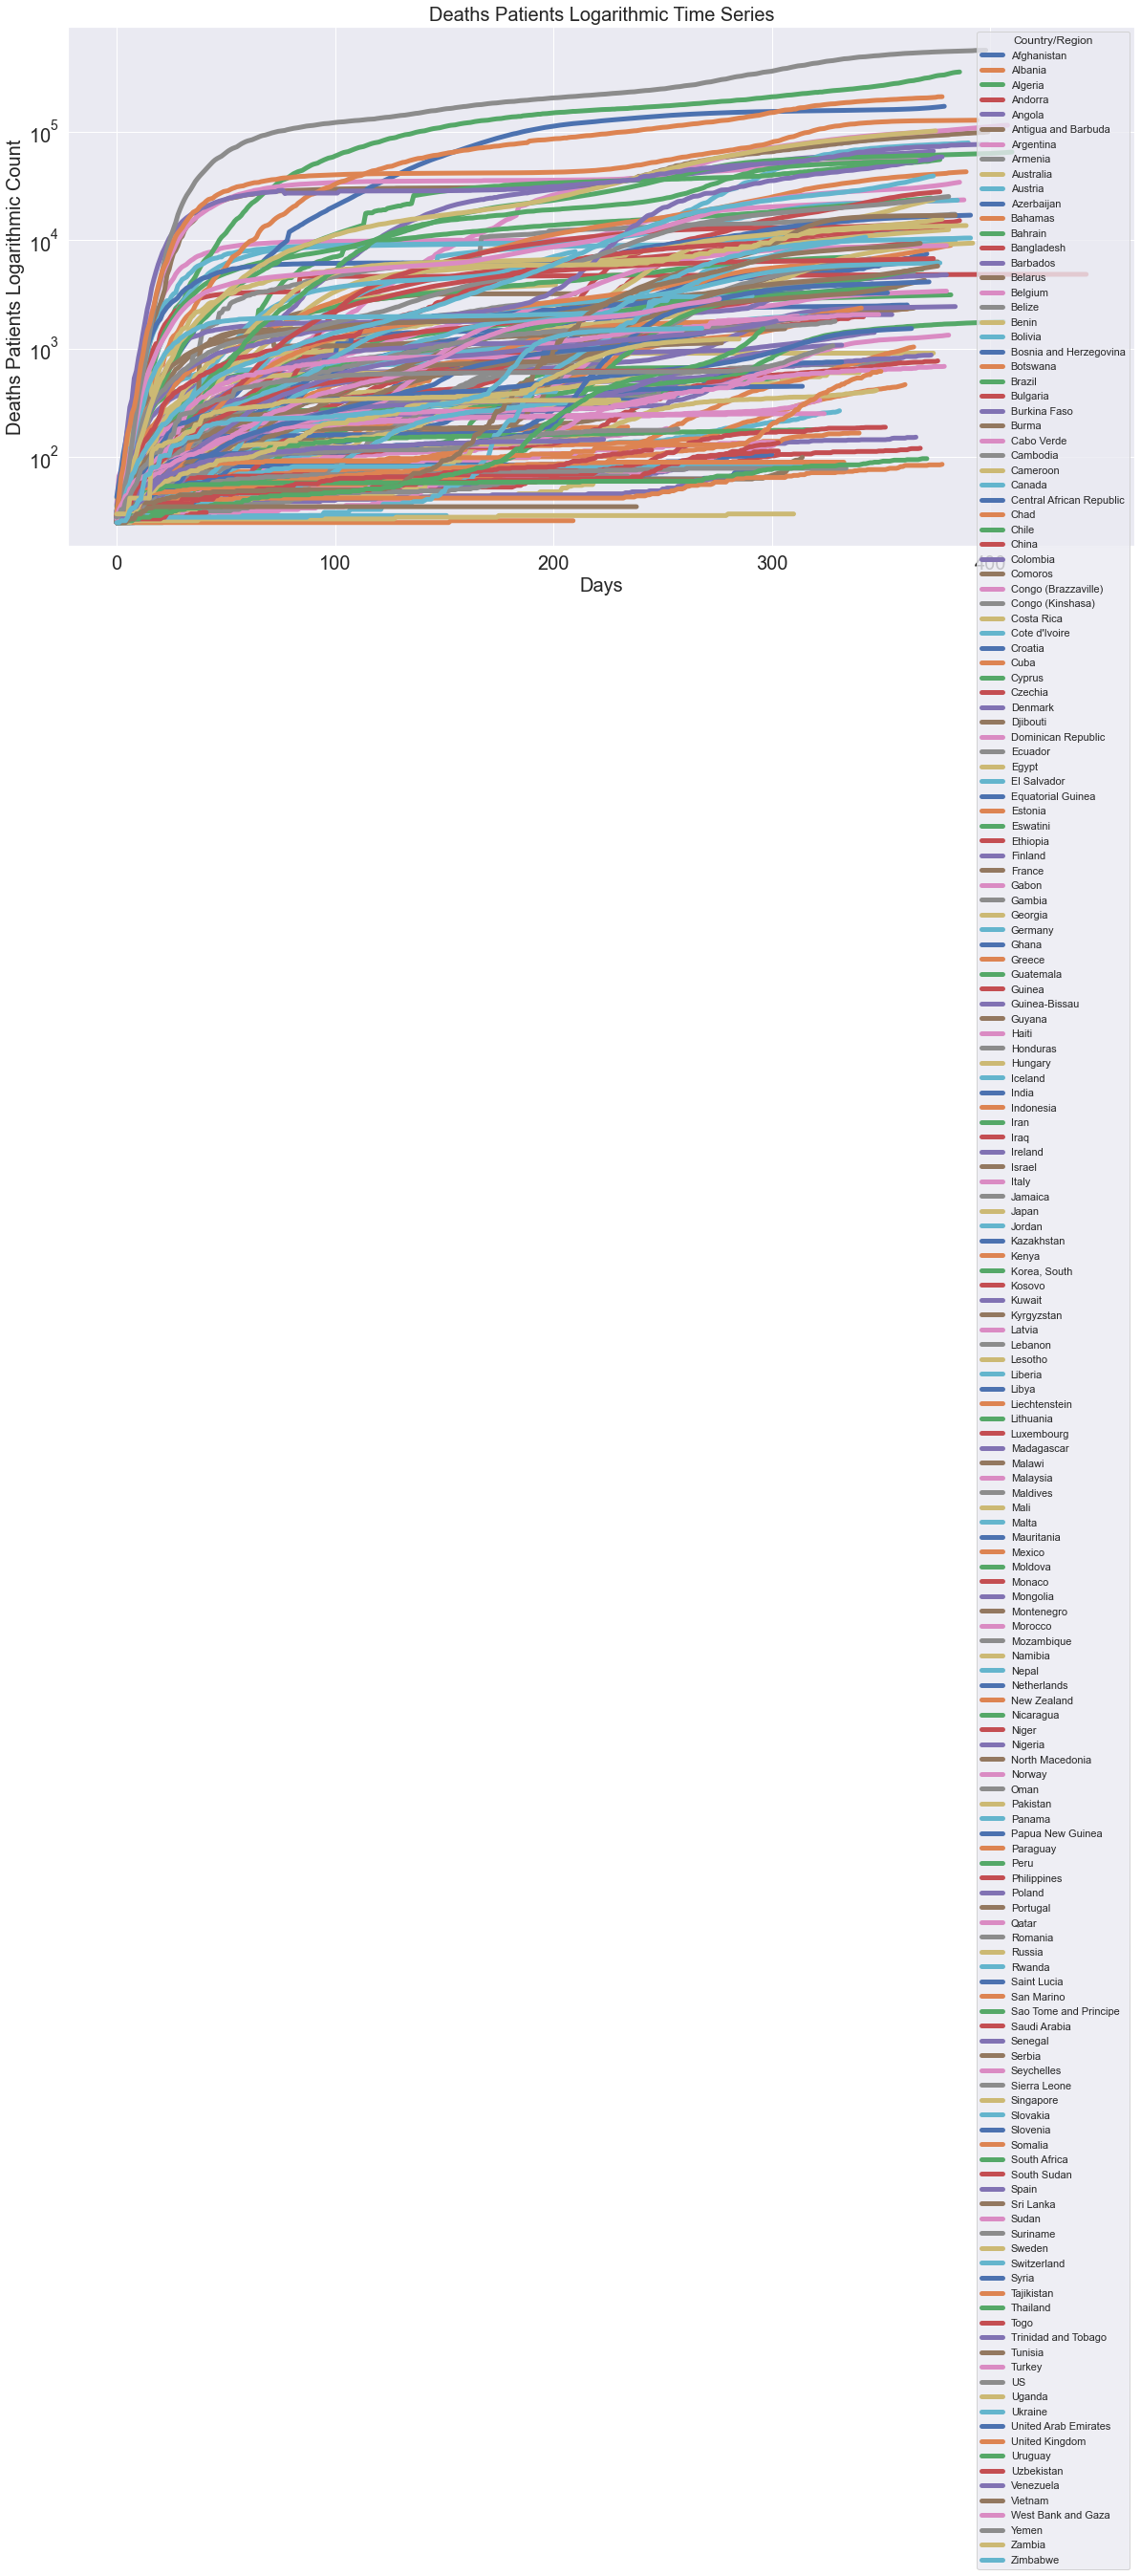

In [43]:
# plot time series of several countries of interest
df2.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Deaths Patients Logarithmic Count', fontsize=20);
plt.title('Deaths Patients Logarithmic Time Series', fontsize=20);

In [45]:
raw_data_recovered = pd.read_csv(death_cases_data_url)
raw_data_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2496,2497,2508,2512,2512,2516,2521,2521,2521,2529
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2256,2265,2274,2283,2291,2297,2304,2310,2317,2321
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3102,3105,3108,3112,3116,3119,3123,3126,3130,3134
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,117,117,117,117,119,120,120,120,120,121
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,540,542,543,547,547,549,549,550,553,554


In [48]:
# group by region
data_day = raw_data_recovered.groupby(['Country/Region']).sum().drop(['Lat','Long'],axis=1)
df = data_day.transpose()

# Melt data so that it is long
data = data_day.reset_index().melt(id_vars='Country/Region', var_name='date')

data.loc[(data.value < 25),'value'] = None

df = data.pivot(index='date', columns='Country/Region', values='value')

datetime_index = pd.DatetimeIndex(df.index)
df.set_index(datetime_index, inplace= True)

In [49]:
df.tail()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-09-05,1410.0,312.0,1549.0,53.0,117.0,NaN,9739.0,895.0,753.0,735.0,...,41638.0,45.0,343.0,NaN,420.0,35.0,177.0,572.0,292.0,206.0
2020-09-06,1413.0,316.0,1556.0,53.0,117.0,NaN,9859.0,897.0,762.0,736.0,...,41640.0,45.0,347.0,NaN,428.0,35.0,181.0,572.0,295.0,206.0
2020-09-07,1416.0,319.0,1562.0,53.0,120.0,NaN,10129.0,900.0,770.0,746.0,...,41643.0,45.0,352.0,NaN,436.0,35.0,184.0,573.0,295.0,210.0
2020-09-08,1419.0,321.0,1571.0,53.0,124.0,NaN,10405.0,903.0,781.0,747.0,...,41675.0,45.0,358.0,NaN,444.0,35.0,190.0,576.0,297.0,218.0
2020-09-09,1421.0,322.0,1581.0,53.0,126.0,NaN,10658.0,905.0,788.0,747.0,...,41683.0,45.0,366.0,NaN,452.0,35.0,192.0,576.0,300.0,222.0


Text(0.5, 1.0, 'Recovered Patients Time series')

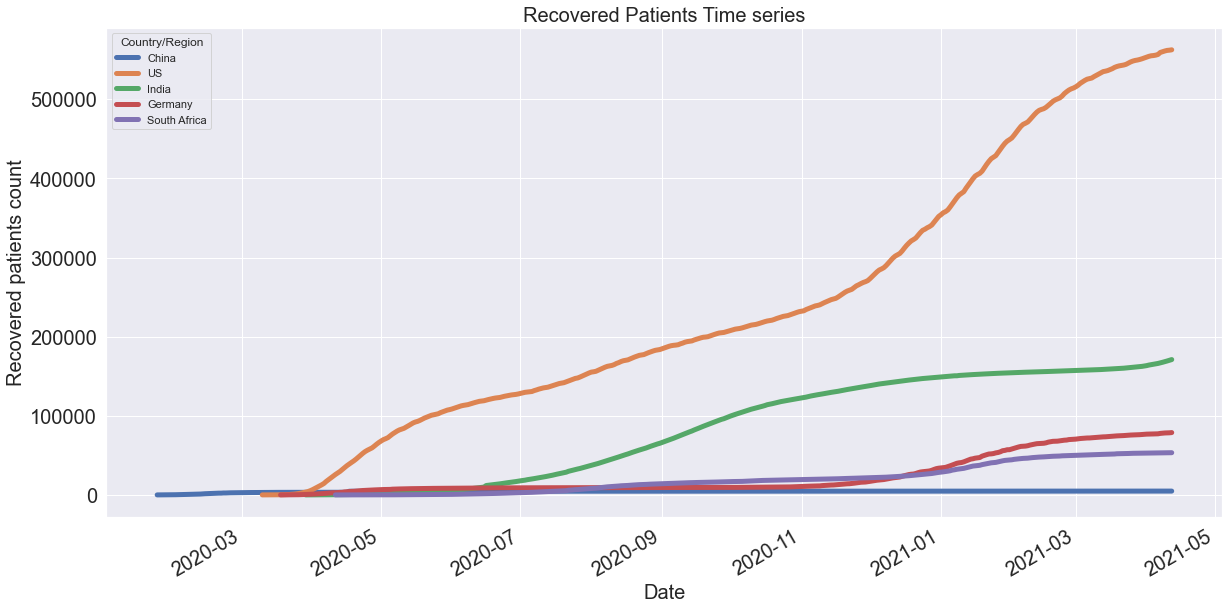

In [50]:
# Plot time series of several countries of interest
poi = ['China','US','India','Germany','South Africa']
df[poi].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.ylabel('Recovered patients count', fontsize=20);
plt.title('Recovered Patients Time series', fontsize = 20)

In [51]:
df.dropna(axis=1, how='all', inplace=True)
df.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,2191.0,1181.0,2762.0,84.0,405.0,NaN,43319.0,2828.0,909.0,6261.0,...,671.0,74237.0,193.0,614.0,1030.0,35.0,1418.0,610.0,390.0,369.0
2021-01-10,2277.0,1241.0,2807.0,85.0,416.0,NaN,44495.0,2929.0,909.0,6723.0,...,708.0,81567.0,256.0,617.0,1061.0,35.0,1604.0,611.0,469.0,507.0
2021-01-11,2288.0,1247.0,2812.0,85.0,420.0,NaN,44654.0,2931.0,909.0,6747.0,...,711.0,82096.0,262.0,617.0,1073.0,35.0,1614.0,612.0,471.0,528.0
2021-01-12,2301.0,1252.0,2816.0,86.0,422.0,NaN,44848.0,2941.0,909.0,6819.0,...,717.0,83342.0,269.0,617.0,1078.0,35.0,1630.0,612.0,495.0,551.0
2021-01-13,2301.0,1256.0,2819.0,87.0,424.0,NaN,44983.0,2951.0,909.0,6868.0,...,723.0,84910.0,275.0,618.0,1084.0,35.0,1658.0,612.0,509.0,589.0


In [52]:
df = df.sort_index()
df1 = df.reset_index().drop(['date'],axis=1)
df1.head()

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
for col in df1.columns:
    print(col, df1[col].first_valid_index())
    df1[col] = df1[col].shift(-df1[col].first_valid_index())
    

Afghanistan 84
Albania 84
Algeria 64
Andorra 78
Angola 172
Antigua and Barbuda 415
Argentina 69
Armenia 93
Australia 72
Austria 62
Azerbaijan 100
Bahamas 212
Bahrain 137
Bangladesh 79
Barbados 391
Belarus 81
Belgium 58
Belize 252
Benin 171
Bolivia 82
Bosnia and Herzegovina 75
Botswana 288
Brazil 60
Bulgaria 79
Burkina Faso 80
Burma 236
Cabo Verde 194
Cambodia 444
Cameroon 88
Canada 61
Central African Republic 152
Chad 106
Chile 73
China 2
Colombia 72
Comoros 356
Congo (Brazzaville) 145
Congo (Kinshasa) 87
Costa Rica 168
Cote d'Ivoire 115
Croatia 82
Cuba 85
Cyprus 261
Czechia 69
Denmark 62
Djibouti 132
Dominican Republic 66
Ecuador 62
Egypt 65
El Salvador 114
Equatorial Guinea 146
Estonia 81
Eswatini 182
Ethiopia 137
Finland 73
France 47
Gabon 145
Gambia 202
Georgia 245
Germany 56
Ghana 114
Greece 64
Guatemala 109
Guinea 143
Guinea-Bissau 163
Guyana 209
Haiti 122
Honduras 81
Hungary 72
Iceland 295
India 67
Indonesia 57
Iran 36
Iraq 62
Ireland 66
Israel 70
Italy 38
Jamaica 225
Japan 54
J

In [54]:
df2 = df1.apply(lambda x: x.shift(-x.first_valid_index()))

Text(0.5, 1.0, 'Recovered Patients Time Series')

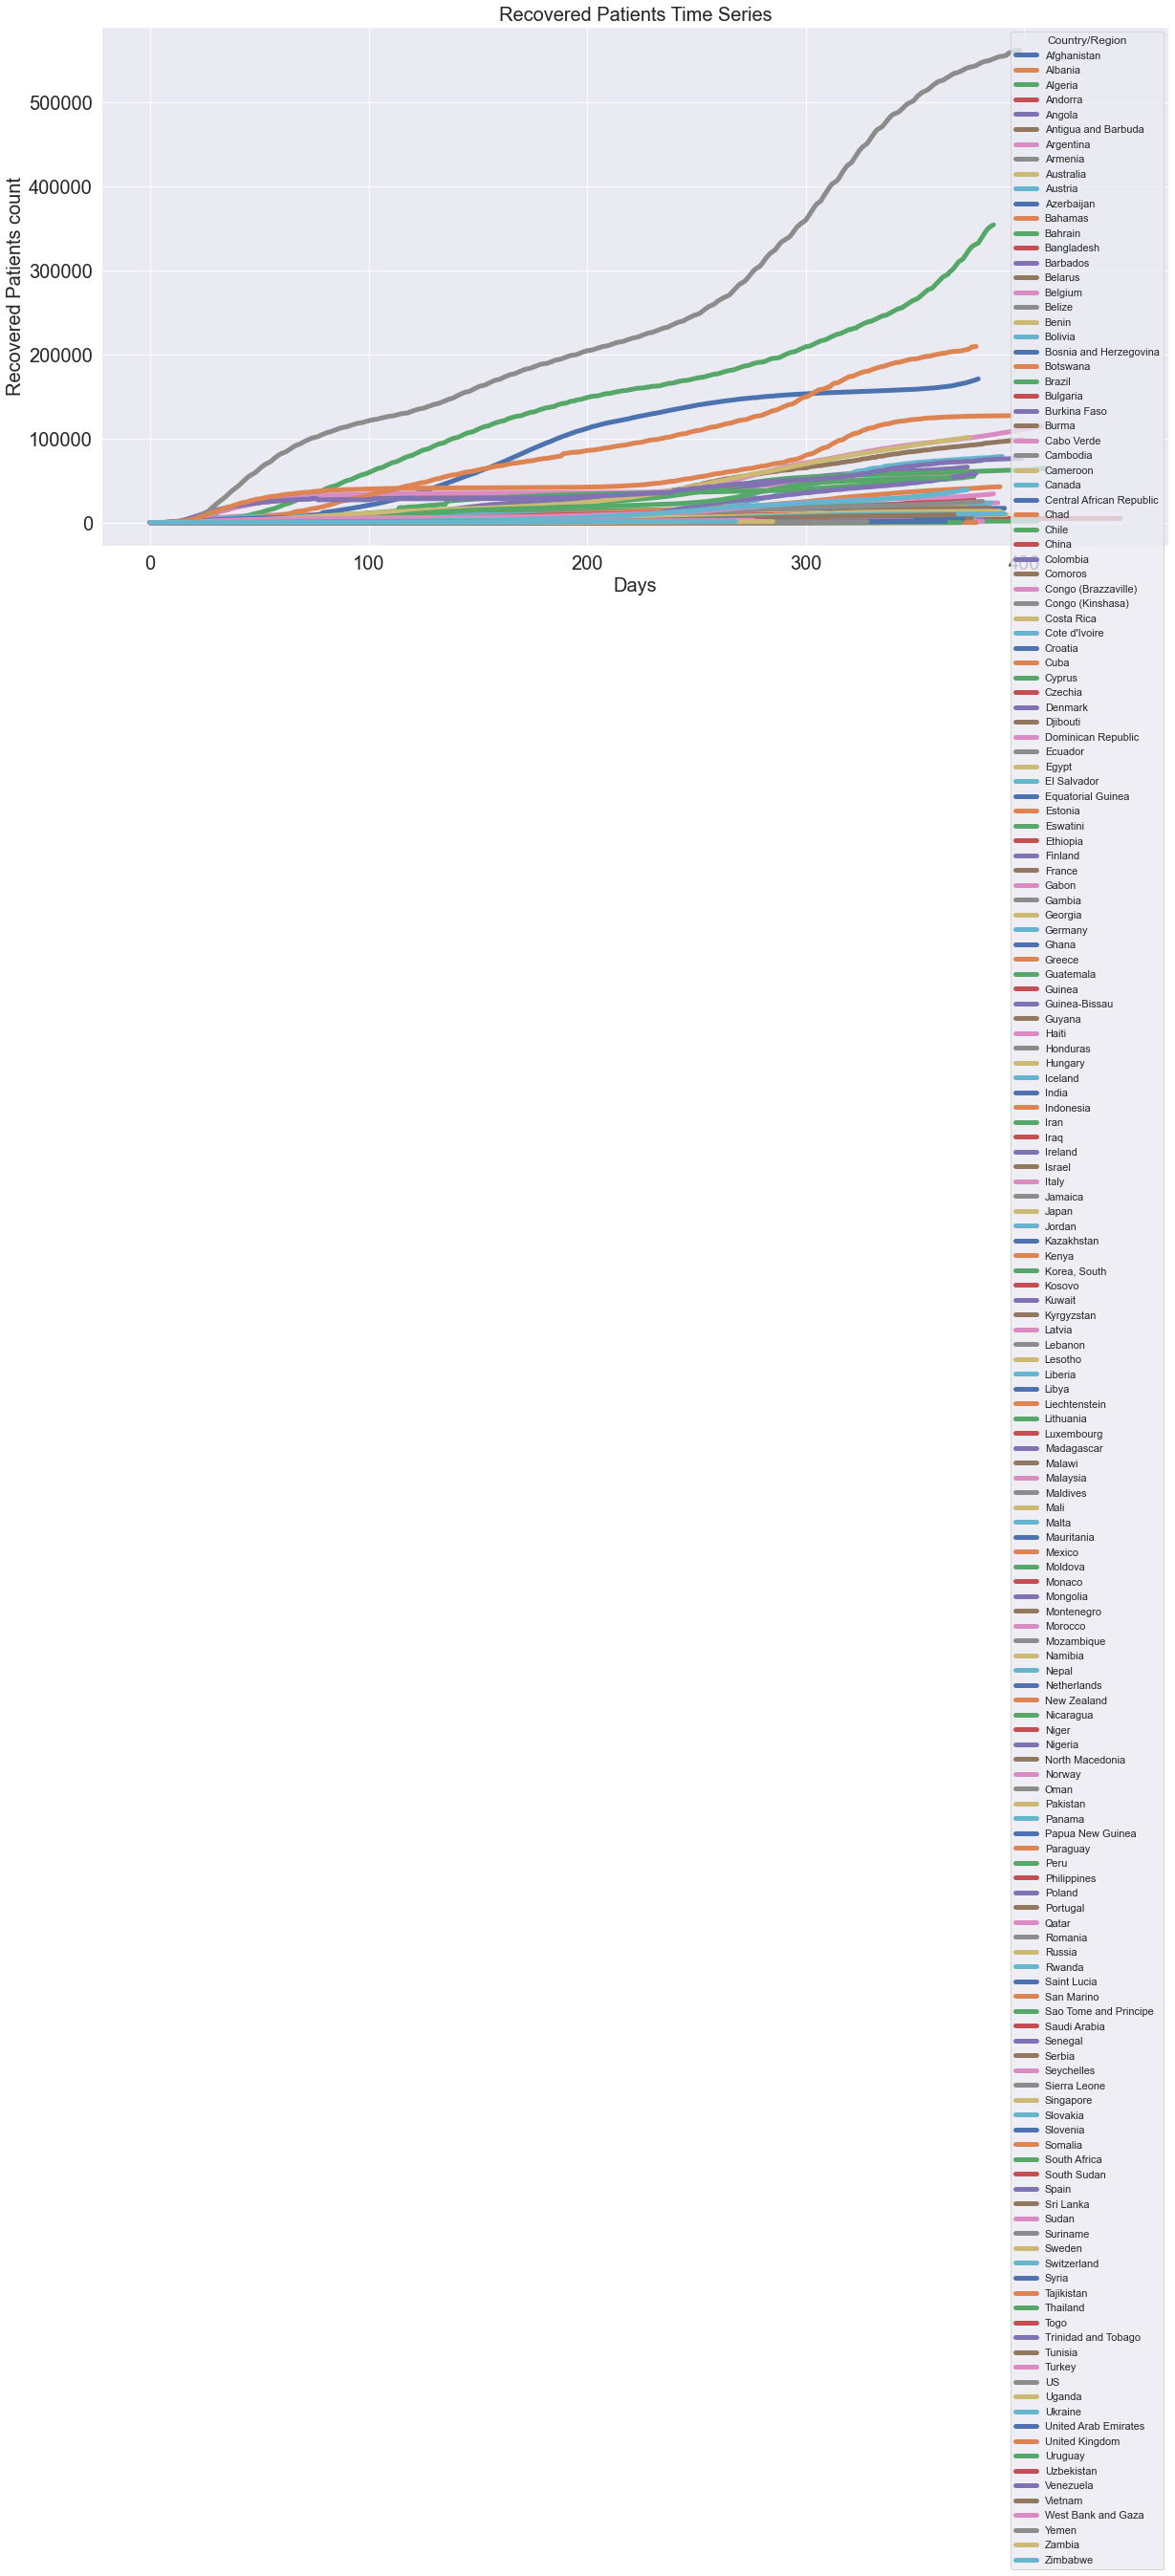

In [55]:
# plot time series of several countries of interest
df2.plot(figsize=(20, 10), linewidth = 5, fontsize =20)
plt.xlabel('Days', fontsize =20)
plt.ylabel('Recovered Patients count', fontsize = 20)
plt.title('Recovered Patients Time Series', fontsize = 20)

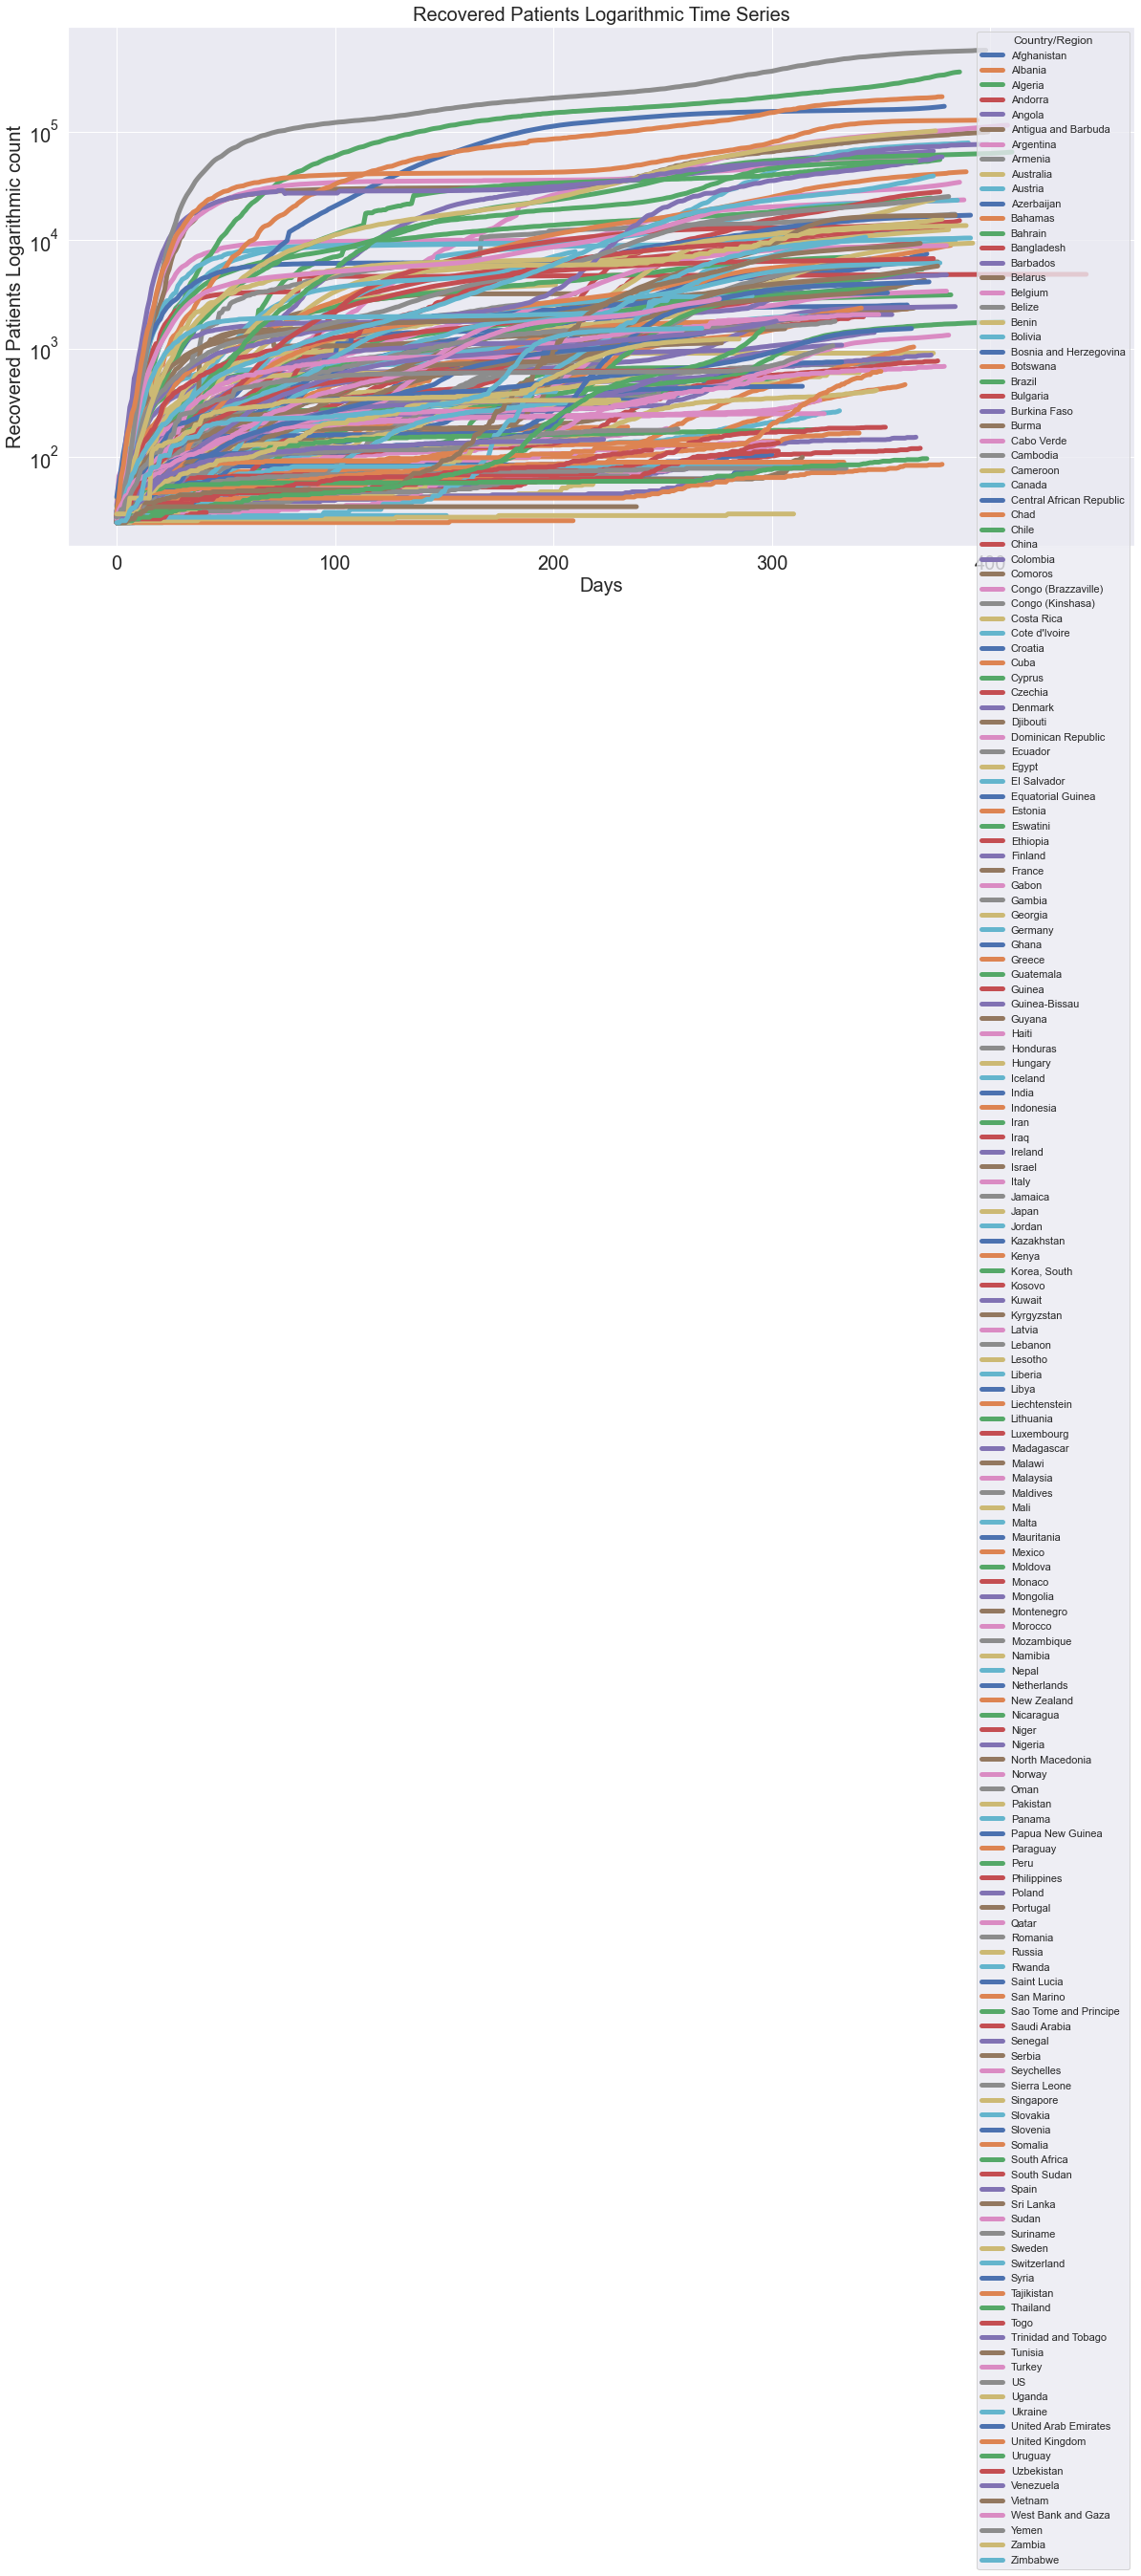

In [56]:
# Plot time series of several countries of interest
df2.plot(figsize=(20,10), linewidth=5, fontsize=20, logy=True)
plt.xlabel('Days', fontsize=20);
plt.ylabel('Recovered Patients Logarithmic count', fontsize=20);
plt.title('Recovered Patients Logarithmic Time Series', fontsize=20);
